In [16]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import networkx as nx
%aimport cpg_search
%aimport cpg_search.run_motif_search
%aimport cpg_search.utils
%aimport cpg_search.plotting
from cpg_search.run_motif_search import *
from cpg_search.utils import *
from cpg_search.plotting import *
from scipy.signal import find_peaks
import pandas as pd

matplotlib.rcParams["savefig.format"] = "pdf"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["font.size"] = 8
matplotlib.rcParams["savefig.transparent"] = True

figure_path = "./figures"
if not os.path.exists(figure_path):
    os.mkdir(figure_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
colors = dict(
    module1="tab:green",
    module2="tab:orange",
    module3="tab:purple",
    module4="tab:brown",
    module5="tab:cyan",
    intermodule_connections="tab:pink",
    l1_node="tab:red",
    r1_node="tab:blue",
    motor_node="tab:olive",
)
for k,v in colors.items():
    colors[k] = mcolors.to_rgba(v)
    print(k, colors[k])
colors['background'] = np.array([0,0,0,0])
def savefig(fig, name,**kwargs):
    fig.savefig(os.path.join(figure_path,name),**kwargs)

('l1_node', (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0))
('r1_node', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0))
('module5', (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
('module4', (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0))
('module3', (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0))
('module2', (1.0, 0.4980392156862745, 0.054901960784313725, 1.0))
('module1', (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0))
('motor_node', (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0))
('intermodule_connections', (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0))


# Figure 1.

[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [-2.  -3. ]
 [-0.5 -4.5]
 [-2.5 -5.5]
 [-1.  -6.5]
 [ 2.  -3. ]
 [ 0.5 -4.5]
 [ 2.5 -5.5]
 [ 1.  -6.5]]


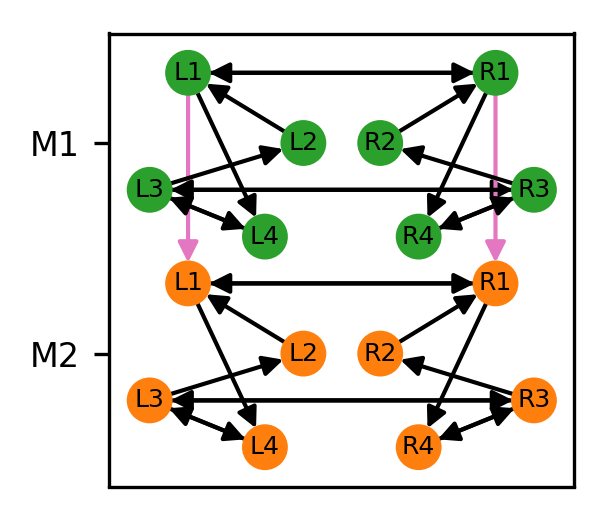

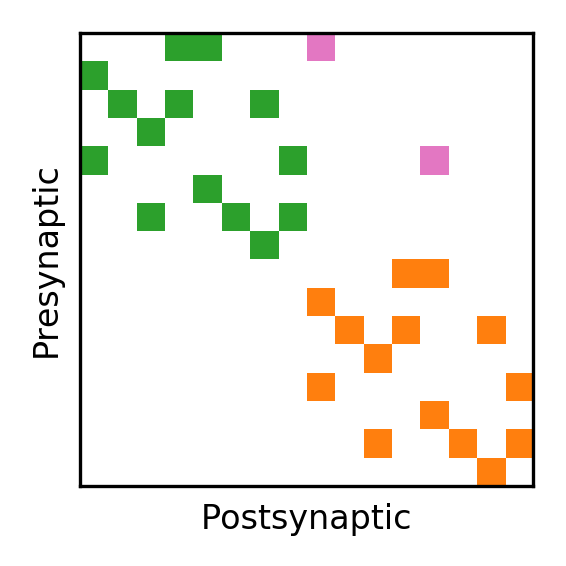

In [283]:
# a) Leech heartbeat

mm = np.array(
[
    [0,0,0,1],
    [1,0,0,0],
    [0,1,0,1],
    [0,0,1,0]
])
lr = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,1,0],
    [0,0,0,0]
])
imm = np.array(
[
    [1,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]
)*2

fig, ax = plt.subplots(figsize=(2,2))
adj = create_adj_matrix(mm,lr,imm, modules=2)
adj[8:,8:] = adj[8:,8:]*3
G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
edge_colors = []
for (u,v) in G.edges():
    if u <= 7 and v >=8:
        edge_colors.append(colors["intermodule_connections"])
    else:
        edge_colors.append((0,0,0))
draw_graph(ax,
           adj, 
           colors=[colors['module1'], colors['module2']],
           m=4,
           node_size=100, 
           font_size=6, 
           arrow_size=5,
           edge_color=edge_colors
          )
savefig(fig,"1a")

# b) leech adj
fig, ax = plt.subplots(figsize=(2,2))
cmap = ListedColormap([colors['background'],colors['module1'],colors['intermodule_connections'], colors['module2']])
draw_adj(ax,adj,cmap=cmap)
# draw_adj(ax,adj)
savefig(fig,"1b")


[[-1.   1.5]
 [-2.5  0. ]
 [-1.5 -1. ]
 [ 1.   1.5]
 [ 2.5  0. ]
 [ 1.5 -1. ]
 [-1.  -3. ]
 [-2.5 -4.5]
 [-1.5 -5.5]
 [ 1.  -3. ]
 [ 2.5 -4.5]
 [ 1.5 -5.5]]


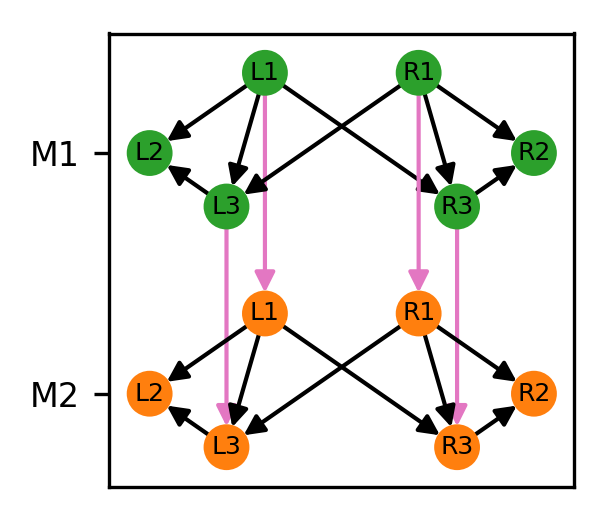

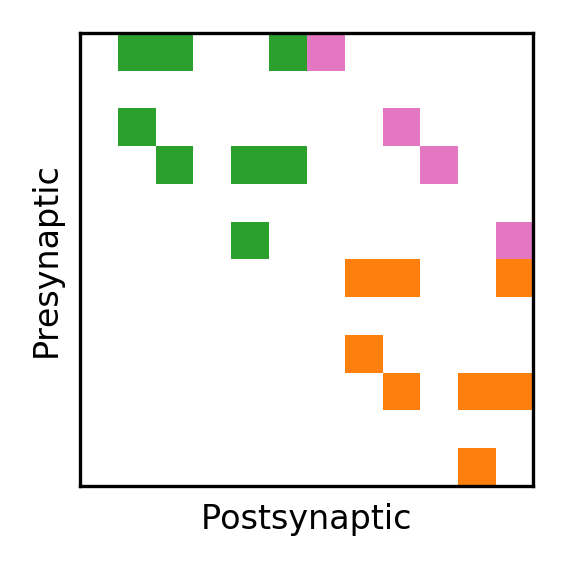

In [284]:
# c) c. elegans
mm = np.array(
[
    [0,1,1],
    [0,0,0],
    [0,1,0],

])
lr = np.array(
[
    [0,0,1],
    [0,0,0],
    [0,0,0],
])

imm = np.array(
[
    [1,0,0],
    [0,0,0],
    [0,0,1],

]
)*2
node_positions = np.array([
    [-1, 1.5], # L1
    [-2.5, 0], # L2
    [-1.5, -1], # L3
    [1, 1.5], # R1
    [2.5, 0], # R2
    [1.5, -1], # R3
]
)
fig, ax = plt.subplots(figsize=(2,2))
adj = create_adj_matrix(mm,lr,imm, modules=2)
adj[6:,6:] = adj[6:,6:]*3
G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
edge_colors = []
for (u,v) in G.edges():
    if u <= 5 and v >=6:
        edge_colors.append(colors["intermodule_connections"])
    else:
        edge_colors.append((0,0,0))
draw_graph(ax,
           adj, 
           colors=[colors['module1'], colors['module2']],
           node_positions=node_positions, 
           m=3,
           node_size=100, 
           font_size=6, 
           arrow_size=5,
           edge_color=edge_colors
          )
savefig(fig,"1c")

# b) leech adj
fig, ax = plt.subplots(figsize=(2,2))
cmap = ListedColormap([colors['background'],colors['module1'],colors['intermodule_connections'], colors['module2']])
draw_adj(ax,adj,cmap=cmap)
# draw_adj(ax,adj)
savefig(fig,"1d")

# Figure 2.

In [241]:
def get_phase_diff(r):
    phase = (r.c1 - r.c2) % (np.pi/2)
    return phase
def get_phase_fitness(r):
    
    fitness = np.abs(r.phase_diff-target_phase)
    return fitness
def get_phase_err_fitness(r):
    phase_err = get_phase_fitness(r)
    err = r.err1 + r.err2
    a = 0.5
    b = 10
    fitness = a*err + b*phase_err
    return fitness

In [242]:
s1_datafile = "sin_fit_results_df2_s0_f.pkl"
s1_datafiles = "data_s0_f"

s2_datafile = "sin_fit_results_df_s2_f_cfg.pkl"
s2_datafiles = "data_s2_s0_f_cfg"

s1_df = pd.read_pickle(s1_datafile)
# Filter s1 df
uniques = np.load('uniques2_s0_f_u.npy')
df = s1_df.copy()
df = df.loc[uniques,:]
df = df.query("abs(a) >= 1e-2")
# Filter out super low frequency waves -- usually bad fit
df = df.query("b > 1")
df['fitness'] = df.apply(lambda r: r.err/np.abs(r.a), axis=1)
s1_sorted = df.sort_values(by='fitness')

s2_df = pd.read_pickle(s2_datafile)
s2_df['fitness'] = -np.inf
s2_df['phase_diff'] = -np.inf
df = s2_df.copy()
df['phase_diff'] = df.apply(get_phase_diff,axis=1)
df = df.query("abs(a1) >= 1e-2 & abs(a2) >= 1e-2")
# Filter out super low frequency waves -- usually bad fit
# df = df.query("b1 > 2 & b2 > 2")
# We want the phase difference to be significant
# df = df.query("abs(c1 - c2) > 1")
# df = df.query("phase_diff > 0.3")
df = df.query("(a1 - a2) < 0.1 ")
df = df.query("(b1 - b2) < 0.1 ")
target_phase = np.pi/6


df['fitness'] = df.apply(get_phase_err_fitness , axis=1)
s2_sorted = df.sort_values(by='fitness')



In [243]:
tslc = slice(3000,4000)
def load_s1_file(row,datapath):
    fn = row.name
    params = tuple(row[['a','b','c','e']])
    with open(os.path.join(datapath,fn)) as fp:
        ret = pickle.load(fp)
    if len(ret['_metadata']) == 2:
        adj = create_adj_matrix(*ret['_metadata'])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    x = ret['motor_values']
    xfit = refit(xfit)
    x = refit(x)
    
    return T,x,xfit,adj,ret['_metadata']
def load_s2_file(row,datapath):
    fn = row.name
    
    with open(os.path.join(datapath,fn)) as fp:
        ret = pickle.load(fp)
    
    adj = create_adj_matrix(*ret['_metadata'], modules=2)
    params = tuple(row[['a1','b1','c1','e1']])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    ret['motor_values'] = np.array(ret['motor_values'])
    x1 = ret['motor_values'][:,0]
    x1fit = xfit
    x1 = x1
    
    params = tuple(row[['a2','b2','c2','e2']])
    refit = lambda x: (np.array(x) - params[-1])/params[0]
    xfit = sin_fit(np.array(ret['time']).ravel(), *params)
    T = ret['time']
    x2 = ret['motor_values'][:,1]
    x2fit = xfit
    x2 = x2
    return T,x1,x1fit,x2,x2fit,adj
def plot_s1_graph(ax,adj):
    # Create graph
    G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
    G.add_node(8)
    G.add_edge(0,8)
    G.add_edge(4,8)
    # Draw graph
    modules = 1
    m=4
    with_labels=False
    kwargs = {}
    node_positions = np.array([
        
        [-2,1.5], # L1
        [-0.5,0], # L2
        [-2.5,-1], # L3
        [-1,-2], # L4
        [2,1.5], # R1
        [0.5,0], # R2
        [2.5,-1], # R3
        [1,-2], # R4
        [0,2] # motor
    ])

    
    print(node_positions)
    w = mcolors.to_rgba('gray')
    
    nodecolors = [colors['l1_node'], w,w,w,colors['r1_node'],w,w,w,colors['motor_node']]
    
#     nodecolors = [colors[0]]*8 + [colors[1]]*8
    nx.draw_networkx(G, pos=node_positions,ax=ax,with_labels=False, node_color=nodecolors , **kwargs)
    nx.draw_networkx_nodes(G.subgraph([8]),with_labels=False,pos={8:[0,2]},node_color=colors['motor_node'],node_shape='s')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
def plot_s2_graph(ax,adj):
    # Create graph
    G = nx.from_numpy_matrix(adj, create_using=nx.DiGraph)
    G.add_node(16)
    G.add_edge(0,16)
    G.add_edge(4,16)
    G.add_node(17)
    G.add_edge(8,17)
    G.add_edge(12,17)
    # Draw graph
    modules = 2
    m=4
    with_labels=False
    kwargs = dict(
        node_size=100, 
       font_size=6, 
       arrow_size=5)
    node_positions = np.array([
        
        [-2,1.5], # L1
        [-0.5,0], # L2
        [-2.5,-1], # L3
        [-1,-2], # L4
        [2,1.5], # R1
        [0.5,0], # R2
        [2.5,-1], # R3
        [1,-2], # R4
        
    ])
    node_positions = np.vstack([node_positions]*modules)
    for i in range(1,modules):
        node_positions[m*2*i:m*2*(i+1),1] -= 4.5*i
    node_positions = np.concatenate((node_positions,[[0,2],[0,-2.5]]))
    w = mcolors.to_rgba('gray')
    
    
    nodecolors = [w]*16
    mncolors = [colors['module1'],colors['module2']]
    nodecolors.extend(mncolors)
    print(node_positions)
    
    nx.draw_networkx(G, pos=node_positions,ax=ax,with_labels=False, node_color=nodecolors , **kwargs)
    nx.draw_networkx_nodes(G.subgraph([16,17]),with_labels=False,pos={16:[0,2],17:[0,-2.5]},node_color=mncolors,node_shape='s',**kwargs)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
def plot_s1_out(ax,T,x,xfit, tslc):
    ax.plot(T[tslc],x[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],xfit[tslc], color=colors['motor_node'], alpha=0.3, lw=2)
    ax.set_xlabel('Time (s)', )
    ax.set_ylabel('Motor value (u)',)
def plot_s2_out(ax,T,x1,x1fit,x2,x2fit, tslc):
    ax.plot(T[tslc],x1[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],x1fit[tslc], color=colors['module1'], alpha=0.3, lw=2)
    ax.plot(T[tslc],x2[tslc], color='k',ls='--',lw=1)
    ax.plot(T[tslc],x2fit[tslc], color=colors['module2'], alpha=0.3, lw=2)
    ax.set_xlabel('Time (s)', )
    ax.set_ylabel('Motor value (u)',)

[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [ 0.   2. ]]
[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [ 0.   2. ]]
[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [ 0.   2. ]]


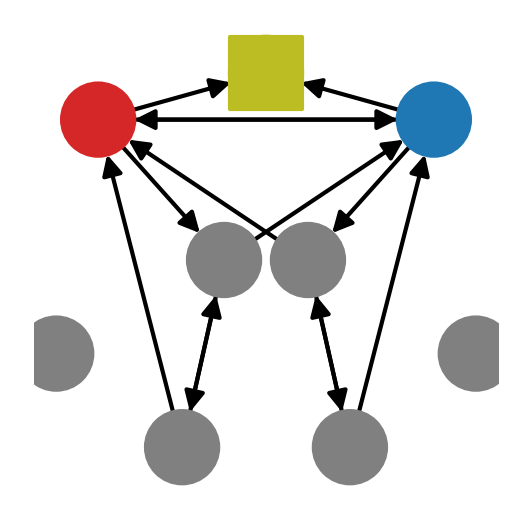

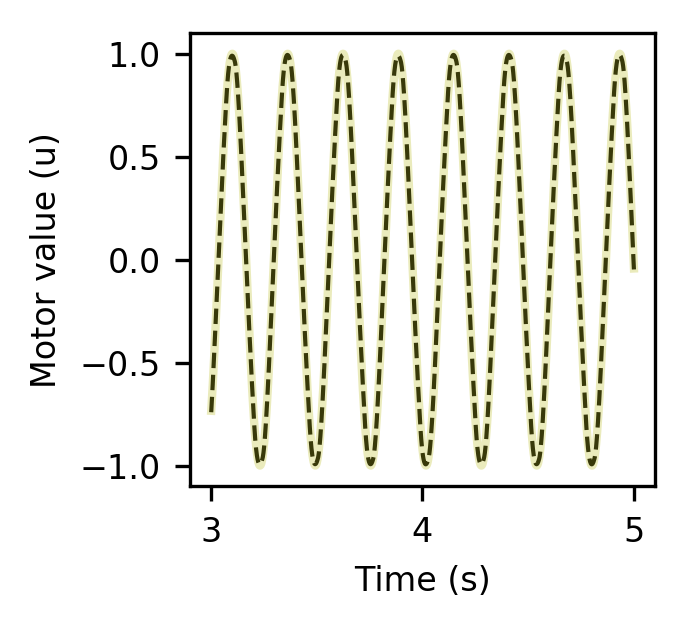

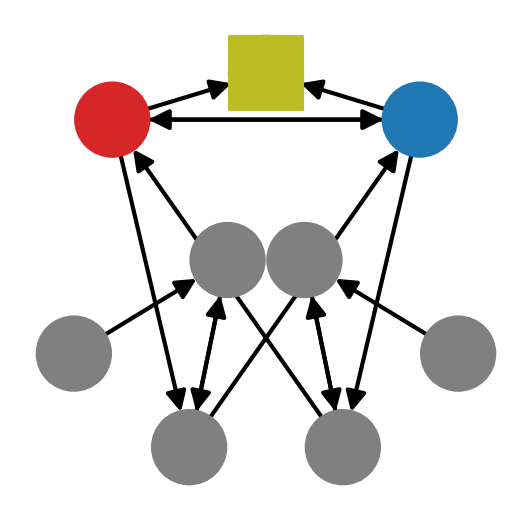

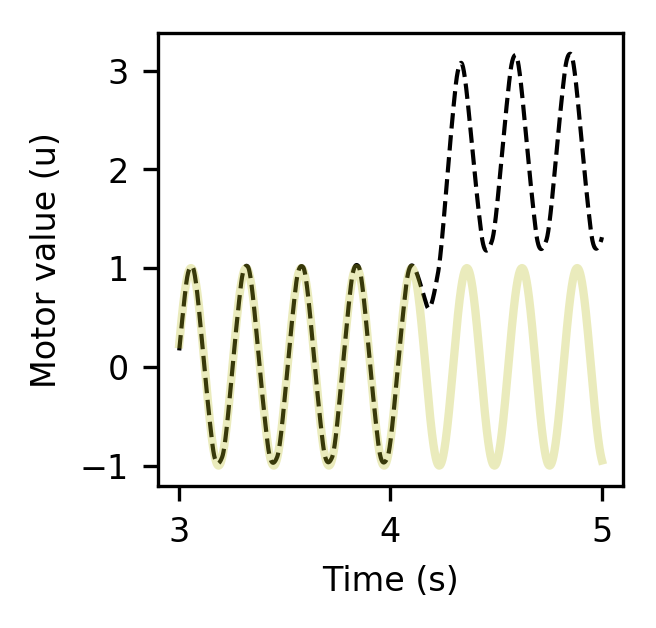

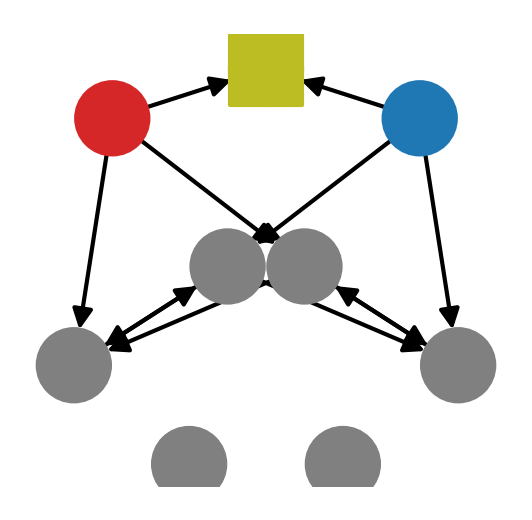

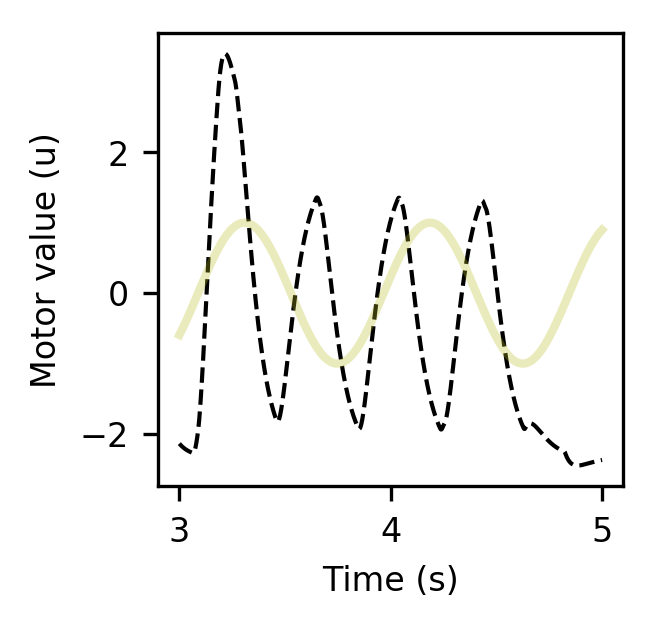

In [252]:
# a,b
fn = s1_sorted.iloc[0]
T,x,xfit,adj,_ = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2))
plot_s1_graph(ax,adj)
savefig(fig,"2a")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"2b")
# c,d
fn = s1_sorted.iloc[99]
T,x,xfit,adj,met = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2))
plot_s1_graph(ax,adj)
savefig(fig,"2c")
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"2d")
# e,f
fn = s1_sorted.iloc[-20]
T,x,xfit,adj,_ = load_s1_file(fn, s1_datafiles)
fig,ax = plt.subplots(figsize=(2,2),tight_layout=False)
plot_s1_graph(ax,adj)
savefig(fig,"2e",bbox_inches=None)
fig, ax = plt.subplots(figsize=(2,2))
plot_s1_out(ax,T,x,xfit,tslc)
savefig(fig,"2f",bbox_inches=None)

[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [-2.  -3. ]
 [-0.5 -4.5]
 [-2.5 -5.5]
 [-1.  -6.5]
 [ 2.  -3. ]
 [ 0.5 -4.5]
 [ 2.5 -5.5]
 [ 1.  -6.5]
 [ 0.   2. ]
 [ 0.  -2.5]]
[[-2.   1.5]
 [-0.5  0. ]
 [-2.5 -1. ]
 [-1.  -2. ]
 [ 2.   1.5]
 [ 0.5  0. ]
 [ 2.5 -1. ]
 [ 1.  -2. ]
 [-2.  -3. ]
 [-0.5 -4.5]
 [-2.5 -5.5]
 [-1.  -6.5]
 [ 2.  -3. ]
 [ 0.5 -4.5]
 [ 2.5 -5.5]
 [ 1.  -6.5]
 [ 0.   2. ]
 [ 0.  -2.5]]


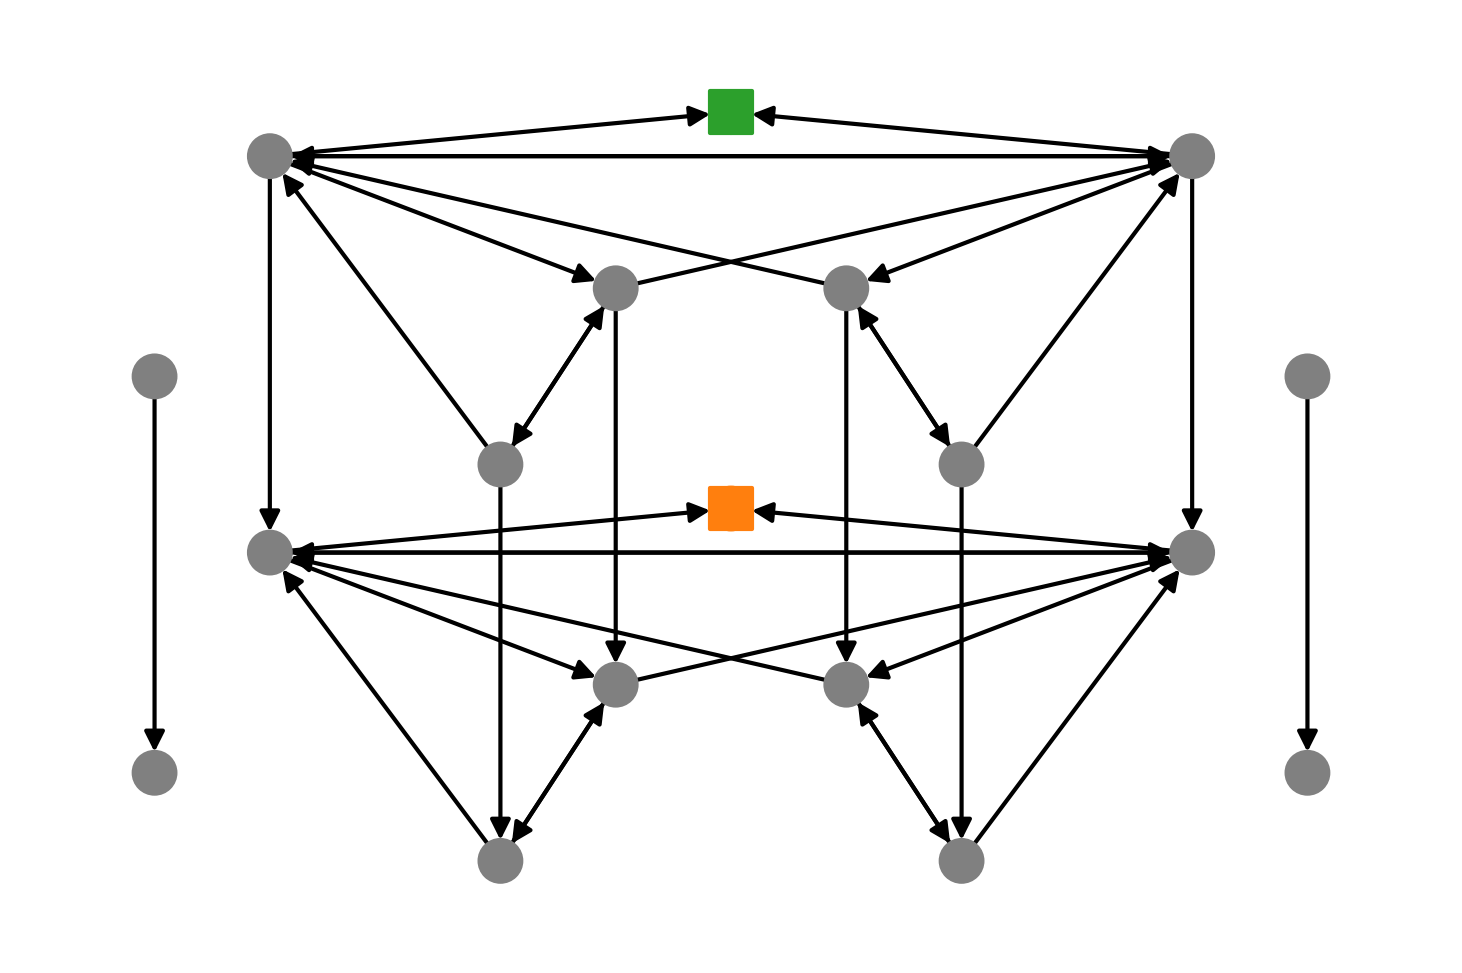

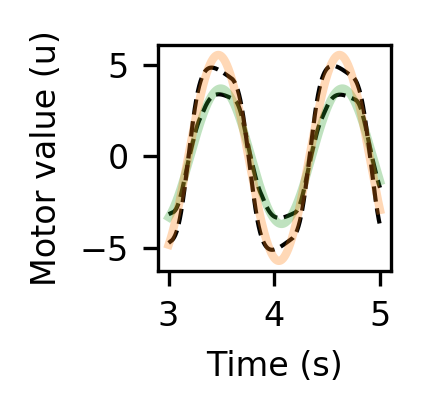

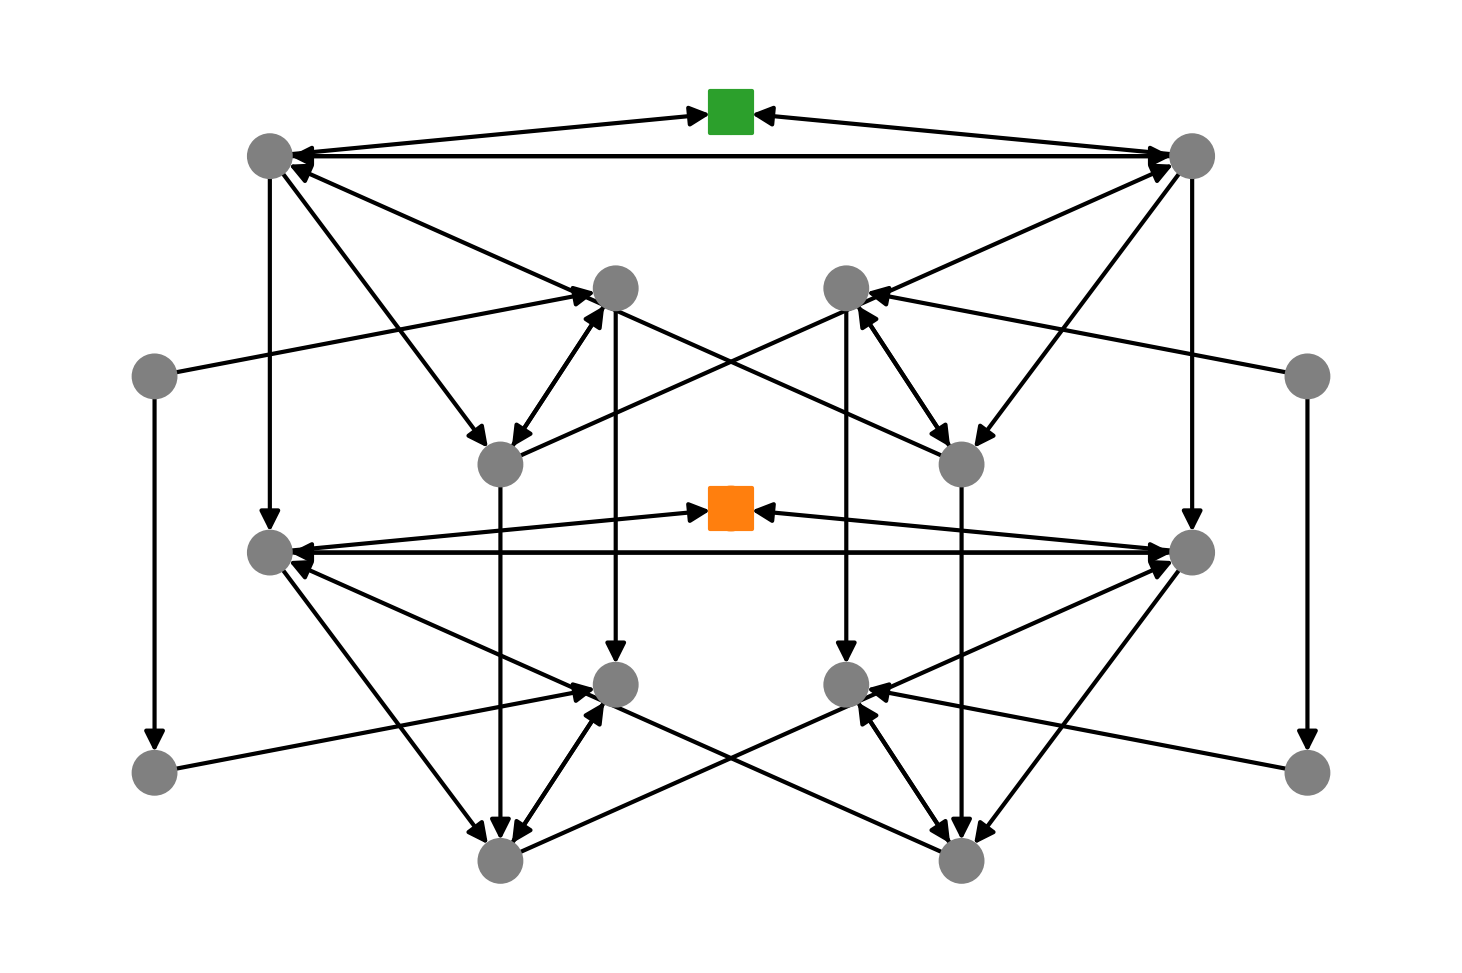

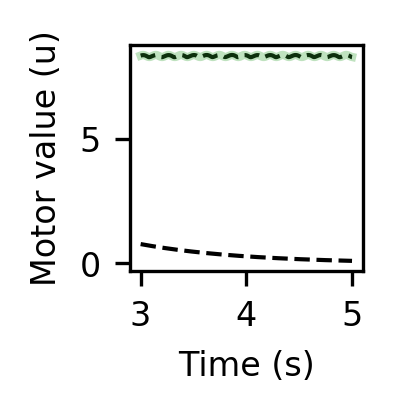

In [245]:
#g,h
tslc = slice(3000,5000)
fn = s2_df.loc["oRcrfZc8c4cQcWcWfDcOcqcXc7f8fQcZcgfLc7cocYfpcVc8cRc1crcjcQc7c6cEc0cLcocjcwcBcMcXcZcRcncEc9cGcDcq.pkl"]

T,x1,x1fit,x2,x2fit,adj = load_s2_file(fn, s2_datafiles)
fig,ax = plt.subplots()
plot_s2_graph(ax,adj)
savefig(fig,"2g")

fig,ax = plt.subplots(figsize=(1,1))
plot_s2_out(ax,T,x1,x1fit,x2,x2fit,tslc)
savefig(fig,"2h")

imm = np.zeros((4,4))
imm[0,0] = 0.02
s1met = (met[0],met[1],imm)
hsh = "{}.pkl".format(make_hash(s1met))

fn = s2_df.loc[hsh]

T,x1,x1fit,x2,x2fit,adj = load_s2_file(fn, s2_datafiles)
fig,ax = plt.subplots()
plot_s2_graph(ax,adj)
savefig(fig,"2i")

fig,ax = plt.subplots(figsize=(1,1))
plot_s2_out(ax,T,x1,x1fit,x2,x2fit,tslc)
savefig(fig,"2j")

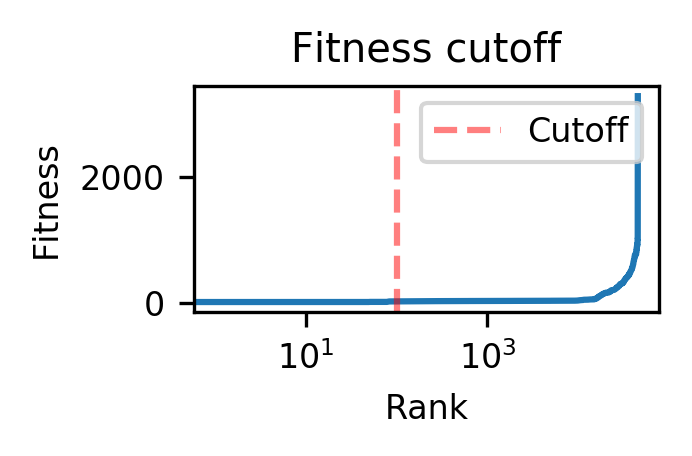

In [246]:
# l
fig, ax = plt.subplots(figsize=(2,1))
y = s1_sorted['fitness'].to_numpy()
x = np.arange(len(y))
ax.plot(x,y)
ebreak_idx = 100
l = ax.axvline(ebreak_idx, ls='--', color='r', alpha=0.5)
ax.set_xlabel('Rank')
ax.set_ylabel('Fitness')
ax.legend([l],['Cutoff'])
ax.title.set_text('Fitness cutoff')
ax.set_xscale('log')
savefig(fig,"2l")

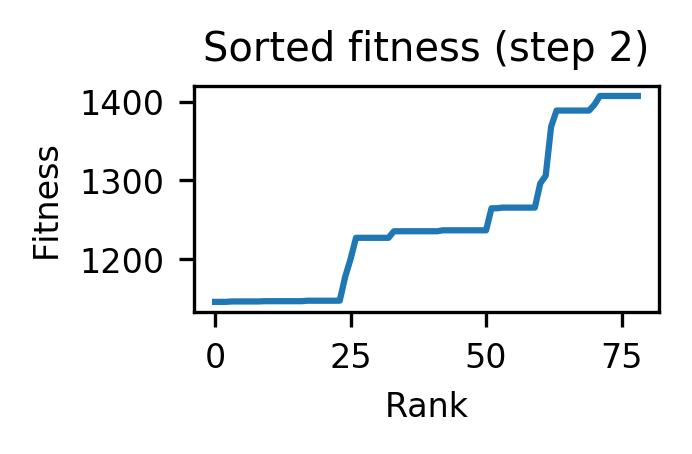

In [247]:
fig, ax = plt.subplots(figsize=(2,1))
ax.plot(s2_sorted['fitness'].to_numpy())
# ebreak_idx = 50
# l = ax.axvline(ebreak_idx, ls='--', color='r', alpha=0.5)
ax.set_xlabel('Rank')
ax.set_ylabel('Fitness')
ax.title.set_text('Sorted fitness (step 2)')
savefig(fig,"2m")

In [5]:

best_performer = '/home/raph/cpg_search/top_preformer_041221_210202.pkl'
def create_best_performer(**kwargs):
    with open(best_performer) as fp:
        metadata = pickle.load(fp)

    mm,lr,imm = metadata[0]
    imm = imm*0.02
    lr = lr
    mm = mm


    N = 12
    defaults = dict(
        neuron_type=nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)
    )


    model,mn, probes1 = generate_nengo_model(
        mm,
        lr,
        imm, 
        modules=N,
        generate_probes=True,
    #     generate_probes=False,
        crop=None, 
        defaults=defaults,
        imm_synapse=nengo.Alpha(0.05),
        w_synapse=nengo.Alpha(0.02),
        **kwargs
    )
    

    adj = create_adj_matrix(mm,lr,imm,modules=N)
    return model,mn,probes1, adj, mm, lr,imm
def run_simple(model):
    with nengo.Simulator(model, seed=0,dt=0.003) as sim:

        for i,ens in enumerate(model.ens):
            signal = sim.model.sig[ens.neurons]
            sim.signals[signal['voltage']][:4] = np.ones(4)
    #         if i == 0:
    #             break

        sim.run(6)
    return sim



# Best performer viz

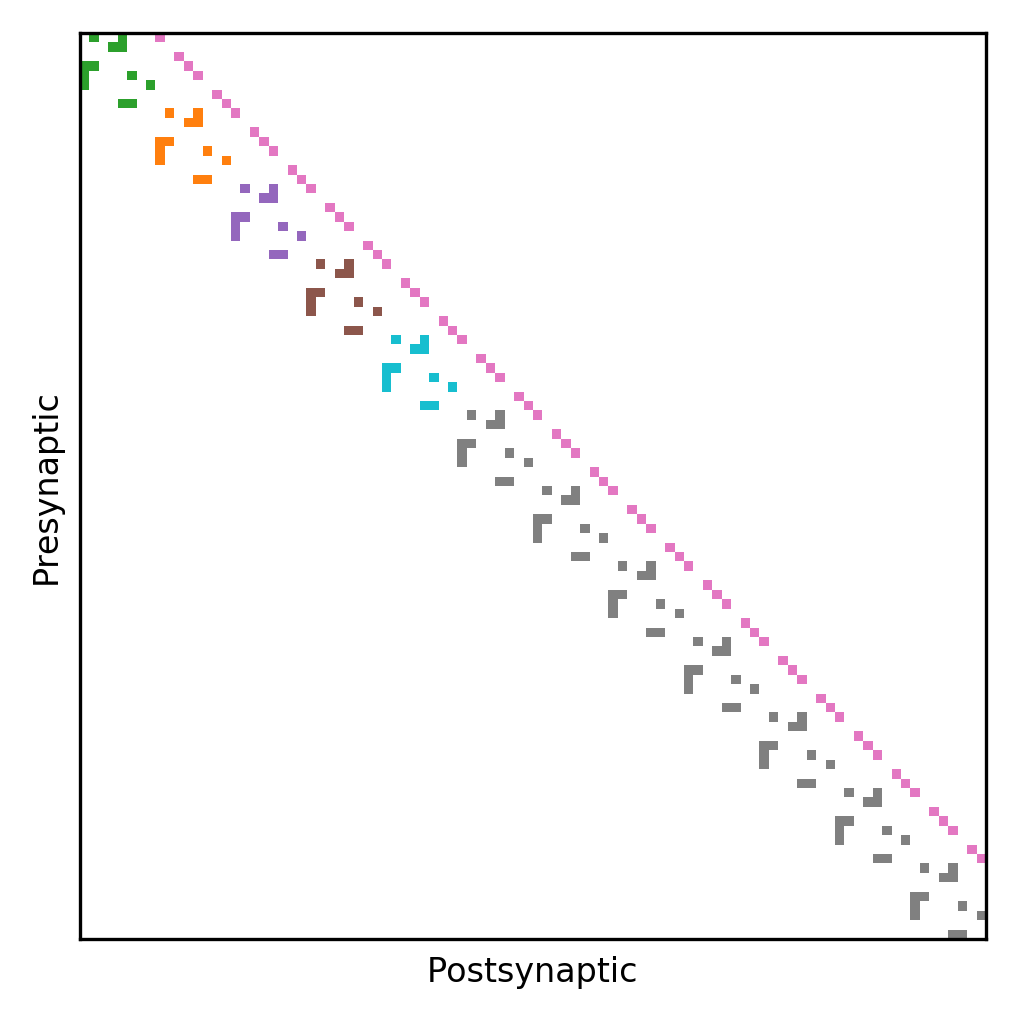

In [256]:
model, mn,probes,adj, mm, lr,imm = create_best_performer()
cmap = ListedColormap([
    colors['background'],
    mcolors.to_rgba('gray'),
    colors['intermodule_connections'], 
    colors['module1'],
    colors['module2'], 
    colors['module3'],
    colors['module4'],
    colors['module5'],
    
    
])
nn = 8
n = 4
modules=12
new_adj = adj.copy()
new_adj[0:8,0:8] = adj[0:8,0:8]*3
new_adj[0:8,8:16] = adj[0:8,8:16]*50*2

for i in range(1,modules):
    bi = (i-1)*nn
    mi = nn*i
    ei = nn*(i+1)
    new_adj[bi:mi,mi:ei] = adj[bi:mi,mi:ei]*50*2
    if i < 5:
        new_adj[mi:ei, mi:ei] = adj[mi:ei, mi:ei]*(i+3)
fig, ax = plt.subplots()
im = draw_adj(ax, new_adj, cmap=cmap)
savefig(fig,'best_performer_adj')
# plt.colorbar(im,ax=ax)

(-57.065, 7.065)


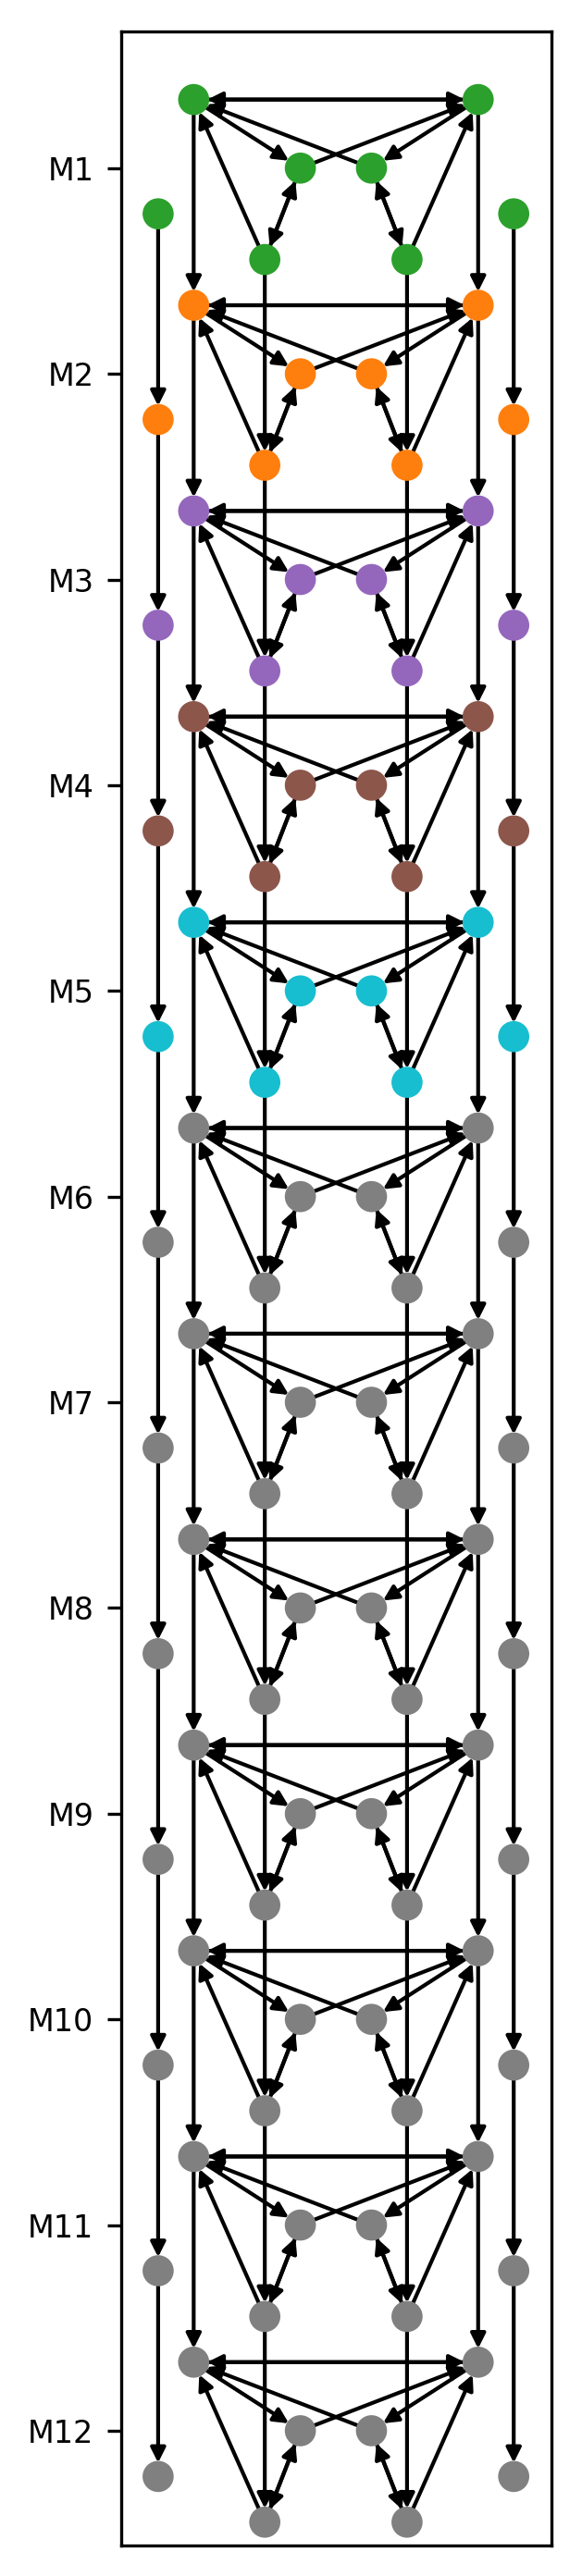

In [267]:
w = mcolors.to_rgba('gray')
ncolors = [
    colors['module1'],
    colors['module2'],
    colors['module3'],
    colors['module4'],
    colors['module5'],
    w,
    w,
    w,
    w,
    w,
    w,
    w,
]
fig,ax = plt.subplots(dpi=300,figsize=(2,12) )
draw_graph(ax,adj, modules=N,colors=ncolors, with_labels=False,node_size=50,arrowsize=8)
print(ax.get_ylim())
ax.set_ylim(-52,3)
savefig(fig, "best_performer_graph")

# Compliance figures
## Baseline

In [197]:
model,mn, probes, adj, mm, lr,imm = create_best_performer()
sim = run_simple(model)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

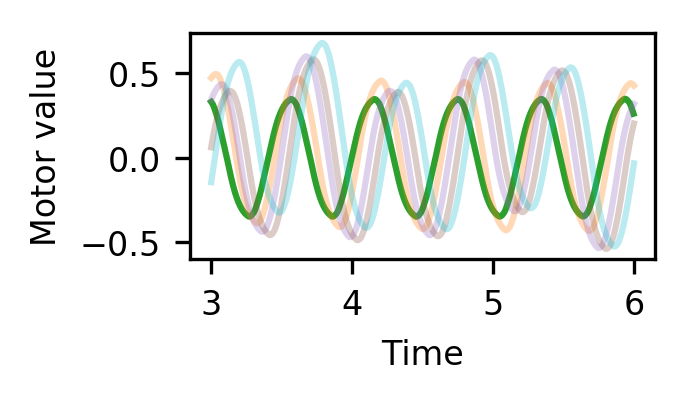

In [198]:
fig,ax = plt.subplots(figsize=(2,1),dpi=300)
plot_output_compliance(ax, mn,begin_time,sim,it=[0,1,2,3,4],insert_time=None)
savefig(fig,'best_performer_baseline')

    
baseline_output = np.array(mn.rets[1:])
# fig.savefig('./figures/2k.pdf')

(6, 1000)


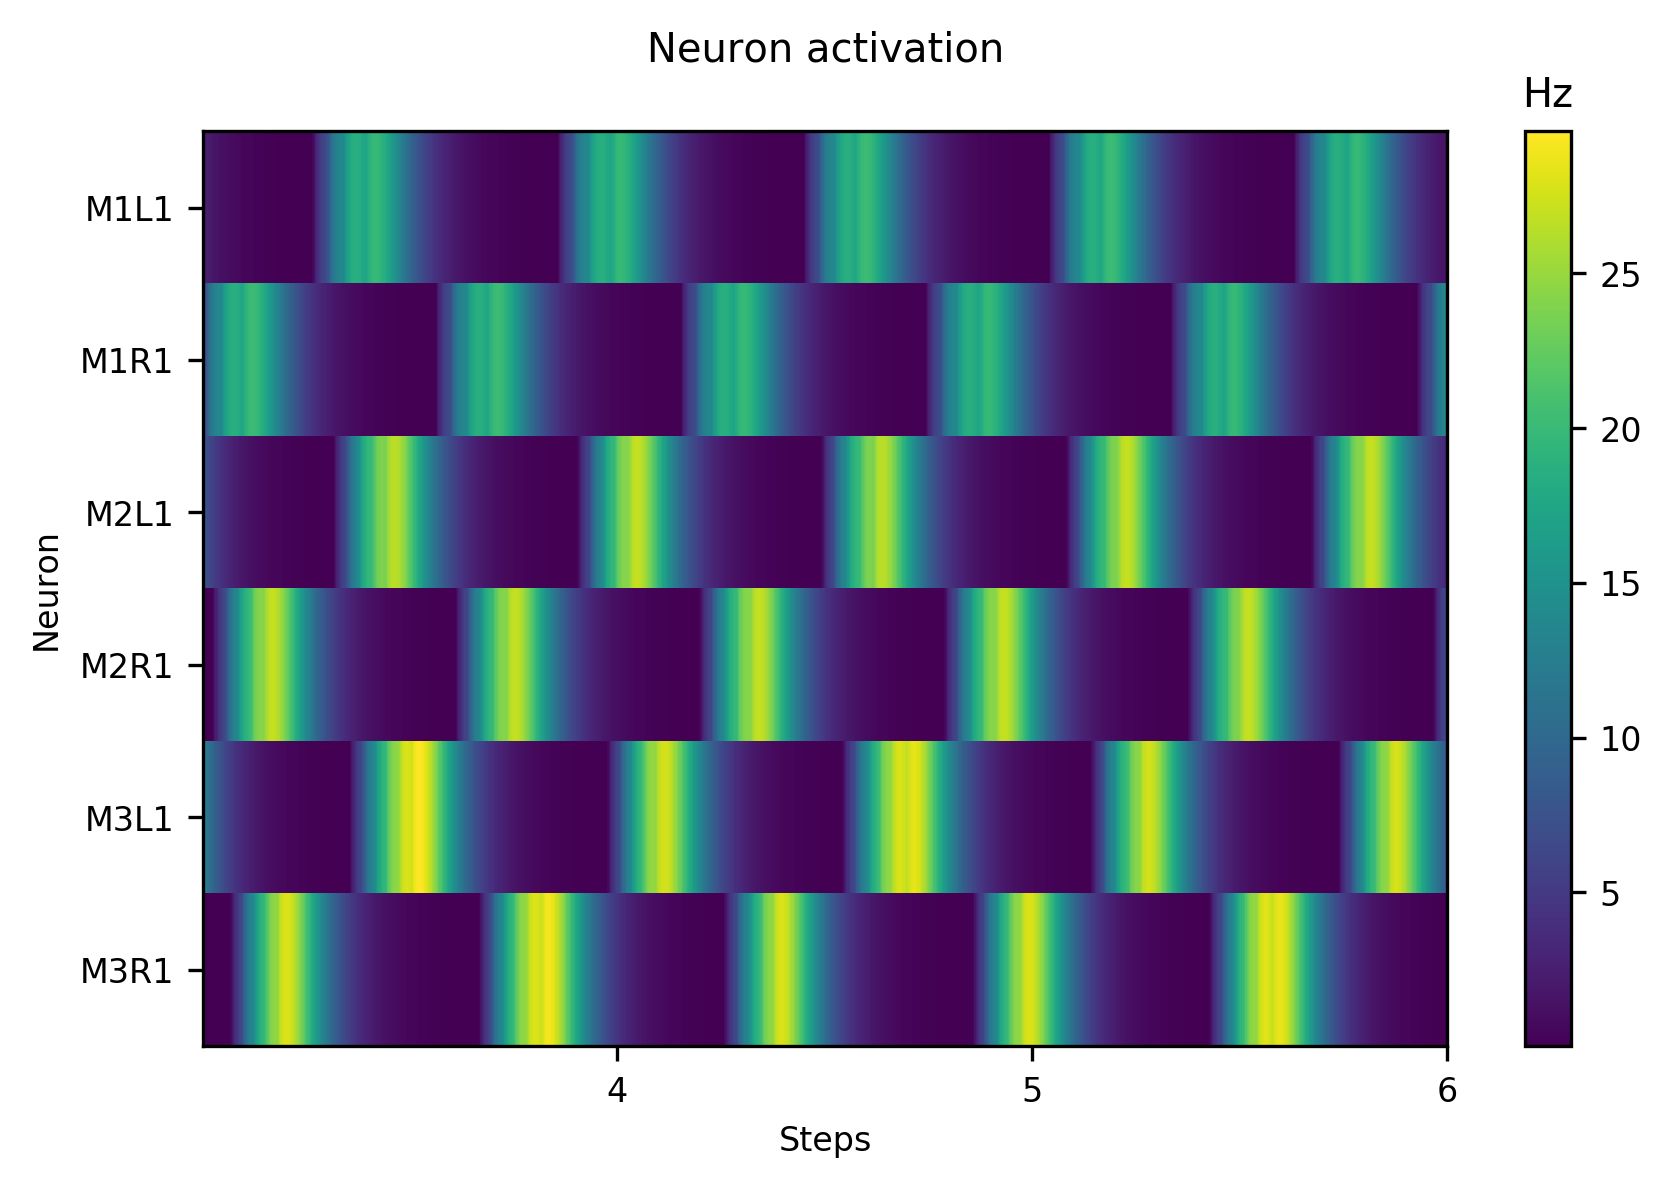

In [80]:
fig, axs = plt.subplots()
plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time)

## Inhibitory current into L1/R1

In [200]:
model, mn, probes, adj, mm, lr, imm = create_best_performer()
insert_time = 4.5
returnval = np.zeros(N*2)
returnval[0] = -0.4
returnval[4] = -0.4
def test_torque_decoding(t,x,ret,dr):
    ret = np.zeros(N*2)
    if t > insert_time:
    
        for i in range(N):
            
            ret[i*2] = -0.4
            ret[i*2+1] = -0.4
            if i==0:
                break
    return ret
            
            
mn.return_fn = test_torque_decoding 
inp_probes = []
with model:
    for ens in model.ens:
        
        inp_probes.append(nengo.Probe(ens.neurons, 'input'))




In [201]:
sim = run_simple(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

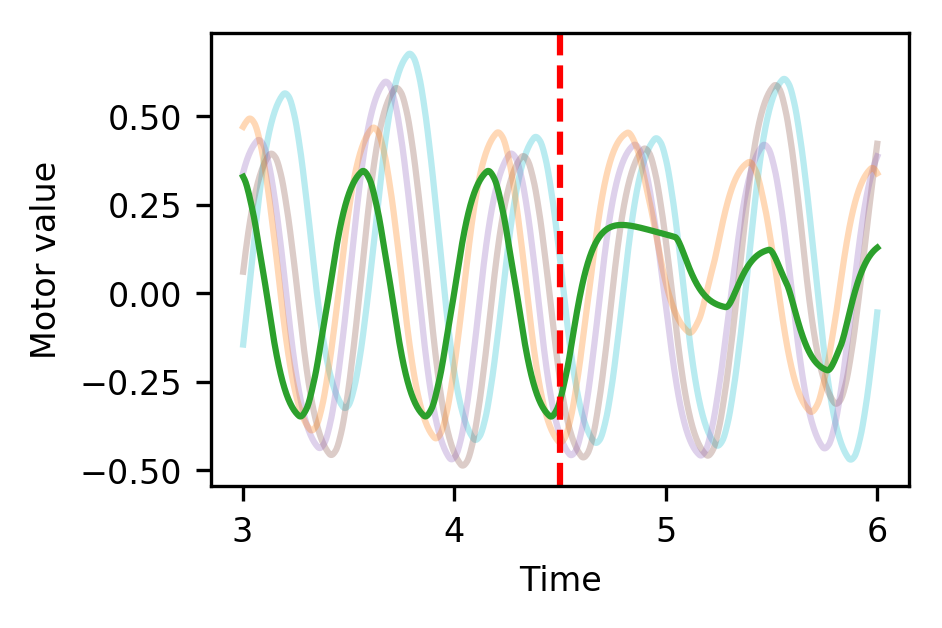

In [202]:
fig,ax =plt.subplots(figsize=(3,2),dpi=300)
plot_output_compliance(ax,mn,begin_time, sim,it=np.arange(4,-1,-1),insert_time=insert_time)
savefig(fig,'inhib_current_l1r1_output')

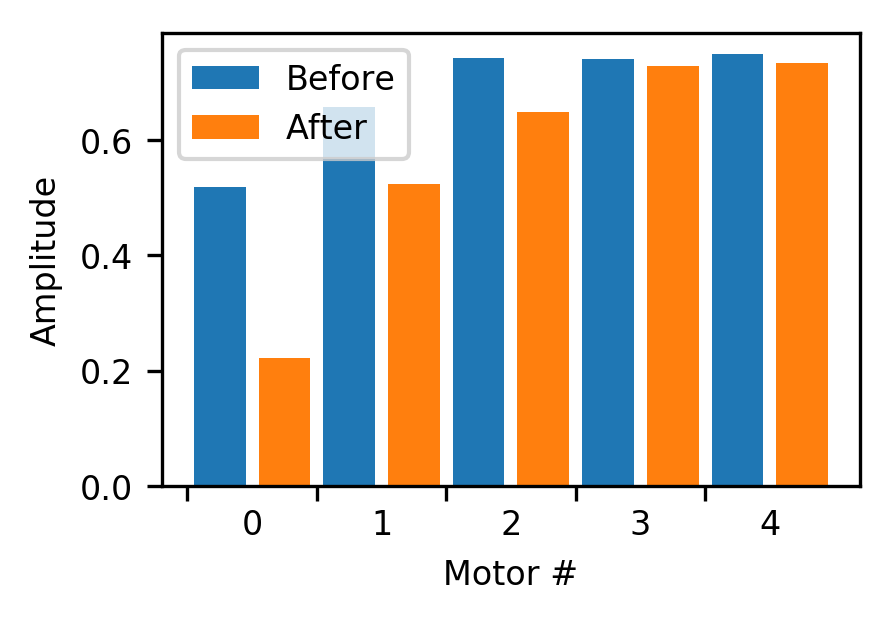

In [203]:
fig,ax = plt.subplots(figsize=(3,2))
plot_before_after_bar(ax,mn,begin_time, sim,insert_time,np.arange(5),baseline_output )
savefig(fig, 'inhib_current_l1r1_bar')

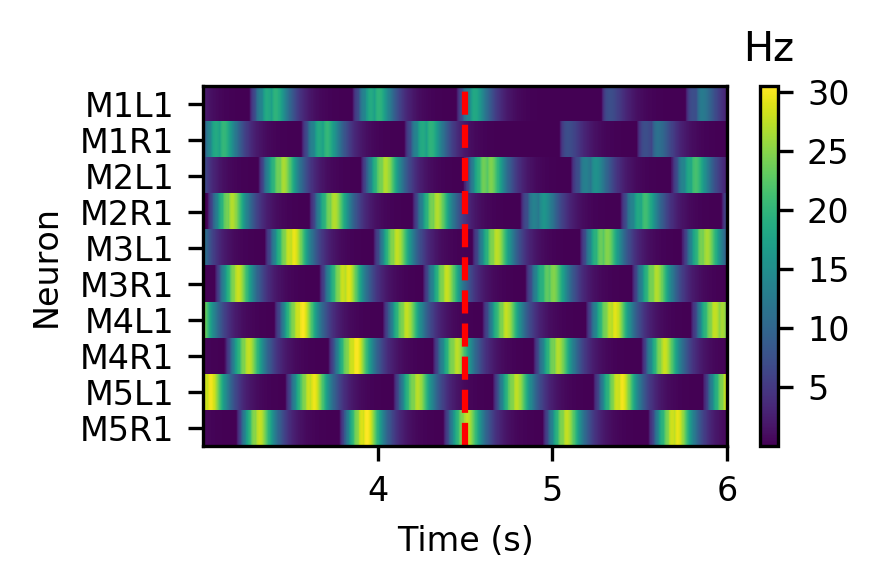

In [189]:
fig, axs = plt.subplots(figsize=(3,2))
plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,insert_time)
savefig(fig, 'inhib_current_l1r1_spikes')

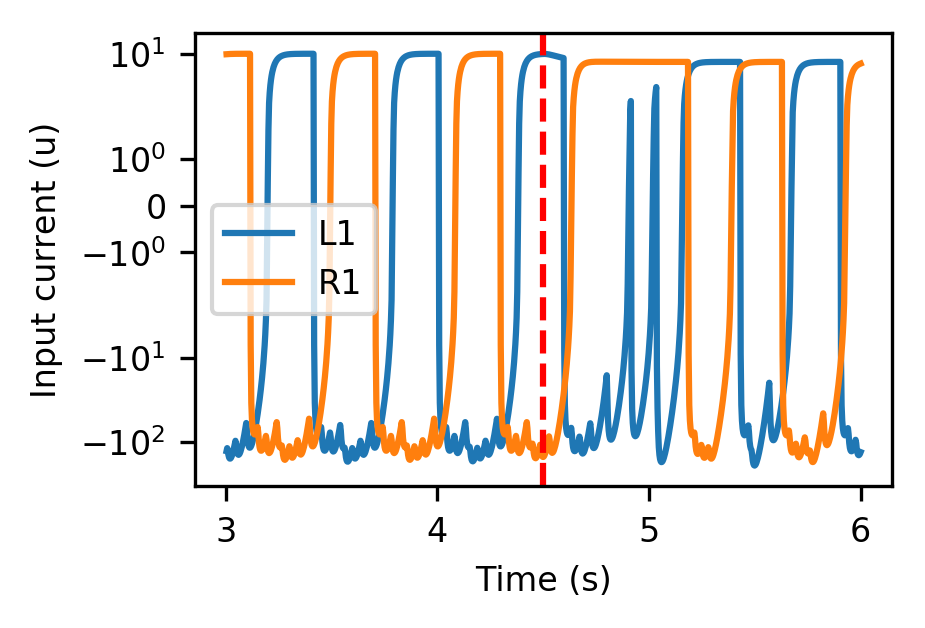

In [142]:
fig, ax = plt.subplots(figsize=(3,2))
plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time)
savefig(fig, 'inhib_current_l1r1_inp')


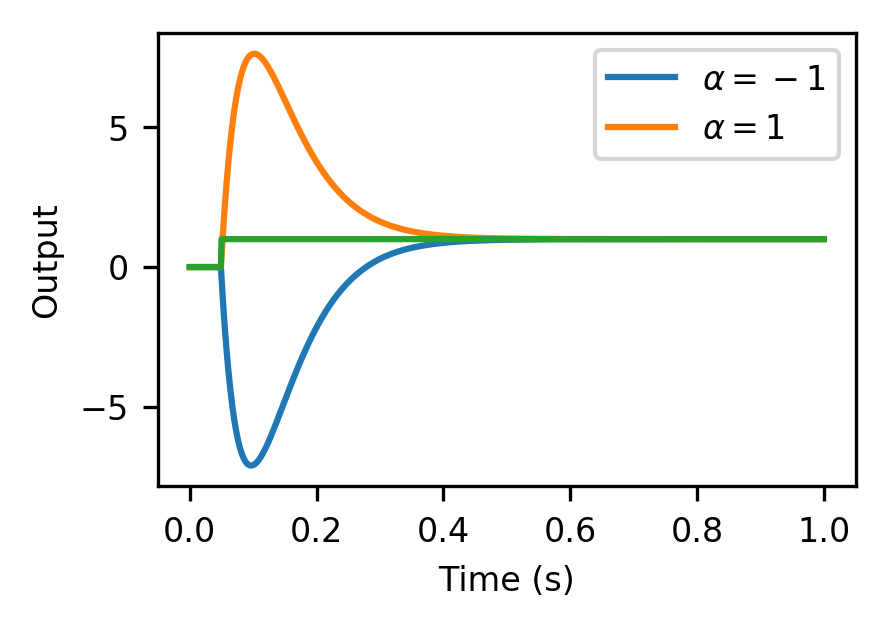

In [14]:
def run_compliance_exp(tau, alpha, method=([0,1,0,1],[1,0,1,0])):
    model, mn, probes, adj, mm, lr, imm = create_best_performer(inp_conn_type='advanced', tau=tau, alpha=alpha)
    negative_alpha = lambda  tau,alpha : nengo.LinearFilter([-alpha,1], [tau ** 2, 2*tau, 1])
    strong_alpha = lambda  tau,alpha : nengo.LinearFilter([alpha,1], [tau ** 2, 2*tau, 1])
    strong_alpha = strong_alpha(tau,alpha)
    negative_alpha = negative_alpha(tau,alpha)
    inp_probes = []
    tf = -1
    begin_time = 3
    insert_time = 4.5
    N = len(probes)
    def test_torque_decoding(t,x,r,dr):
        ret = np.zeros(N*4)
        trq = -1
        sc = 0.4

        if t > insert_time:
            for i in range(N):
#                 val = [-1,1,-1,1] if dr[i] < 0 else [1,-1,1,-1]
                val = method[0] if dr[i] < 0 else method[1]
                val = np.array(val)*sc*trq
                ret[i*4] = val[0]
                ret[i*4+1] = val[1]
                ret[i*4+2] = val[2]
                ret[i*4+3] = val[3]
                if i==0:
                    break


        return ret
    mn.return_fn = test_torque_decoding
    
    with model:
        for ens in model.ens:
            inp_probes.append(nengo.Probe(ens.neurons,'input'))


 
    x = np.zeros(500)
    t = np.linspace(.0,0.5,500)

    x[50:] = 1
    fig,ax = plt.subplots(figsize=(3,2))
    ax.plot(t,negative_alpha.filt(x))
    ax.plot(t,strong_alpha.filt(x))
    ax.plot(t,x,color='k')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Output')
    ax.legend([r'$\alpha = -{}$'.format(alpha),r'$\alpha = {}$'.format(alpha)],loc=1)
    ax.title.set_text(r'$\tau={}$'.format(tau))
    savefig(fig,'synapse_filter_t%ia%i_m%s_step_resp' %(tau*1000,alpha*1000,str(method)))

    sim = run_simple(model)
    fig,ax =plt.subplots(figsize=(3,2),dpi=300)
    plot_output_compliance(ax,mn,begin_time, sim,it=np.arange(4,-1,-1),insert_time=insert_time)

    savefig(fig,'inhib_current_filt_t%ia%i_m%s_output'%(tau*1000,alpha*1000,str(method)))
    
    
    
    fig, ax = plt.subplots(figsize=(3,2))
    plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time)
    savefig(fig, 'inhib_current_filt_t%ia%i_m%s_inp'%(tau*1000,alpha*1000,str(method)))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

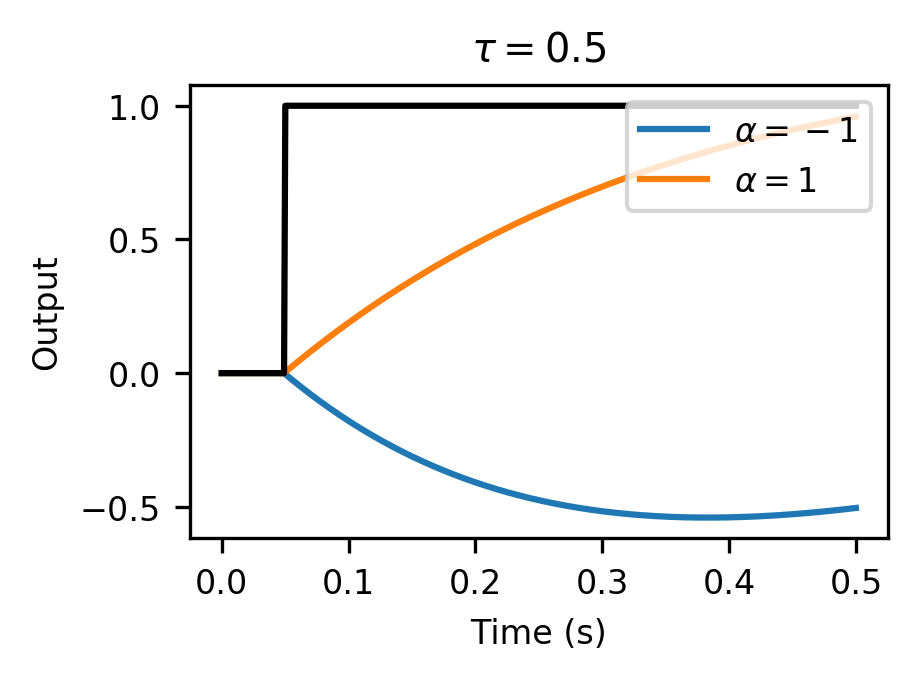

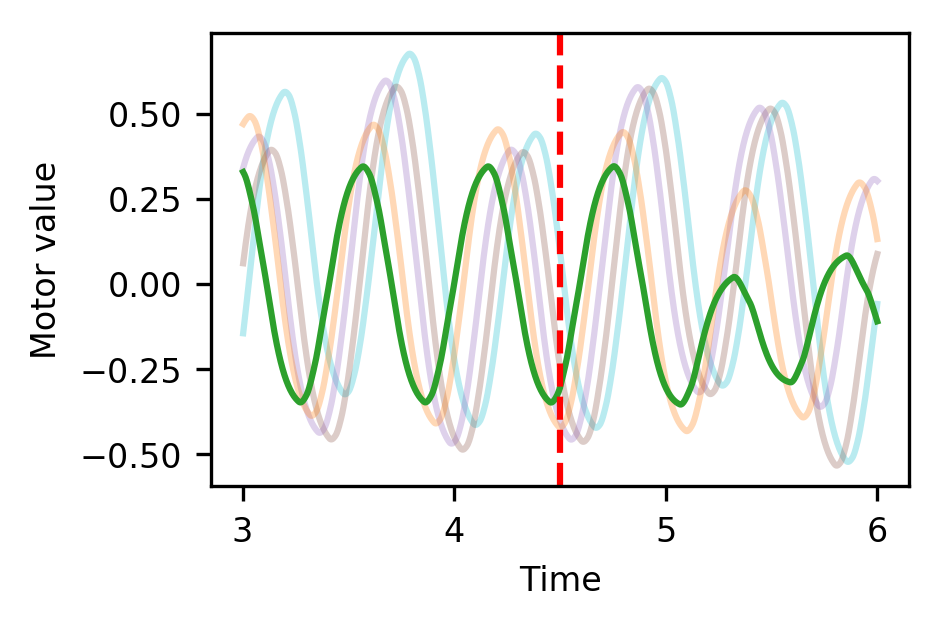

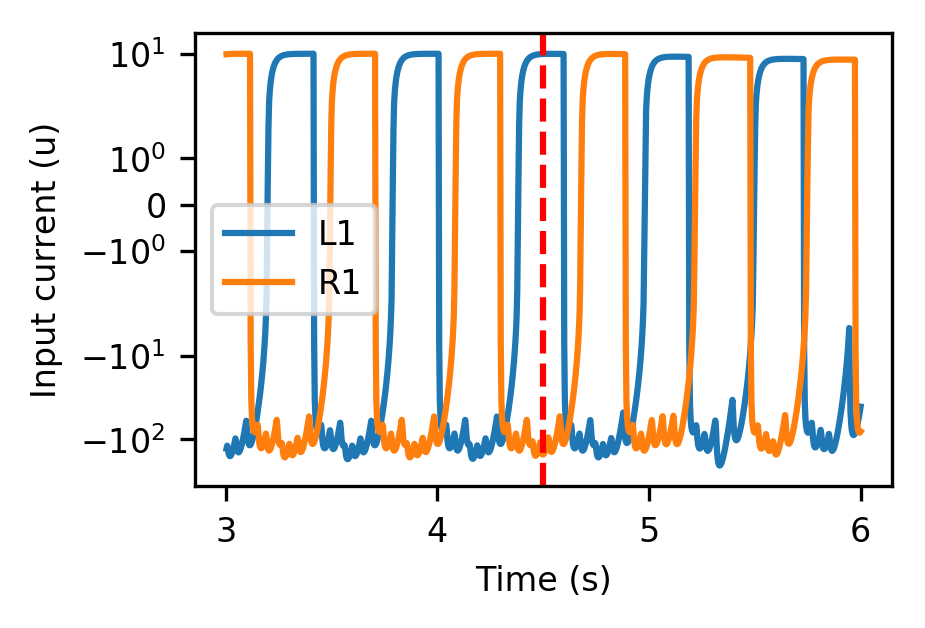

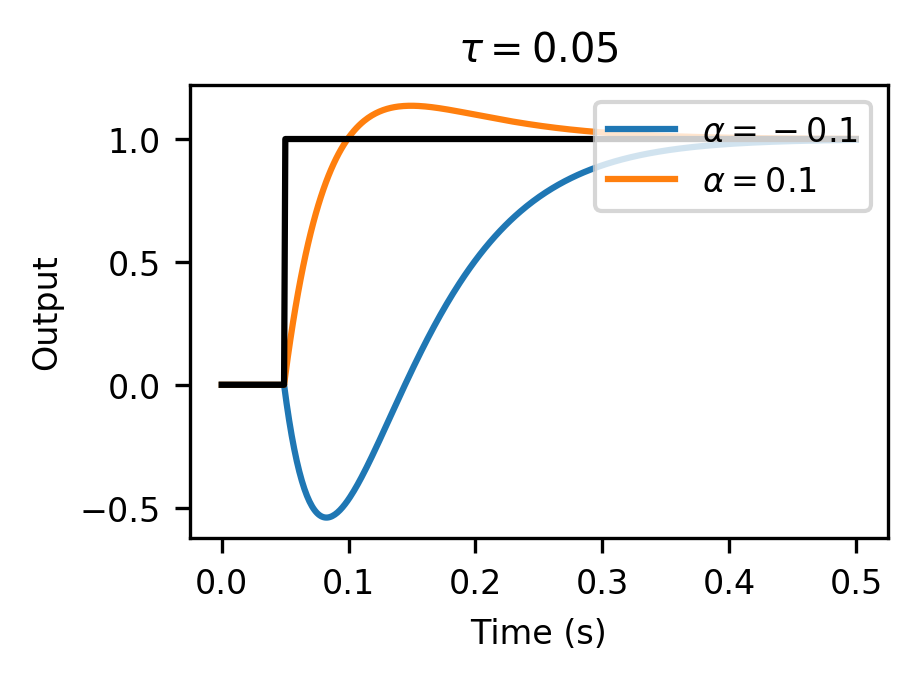

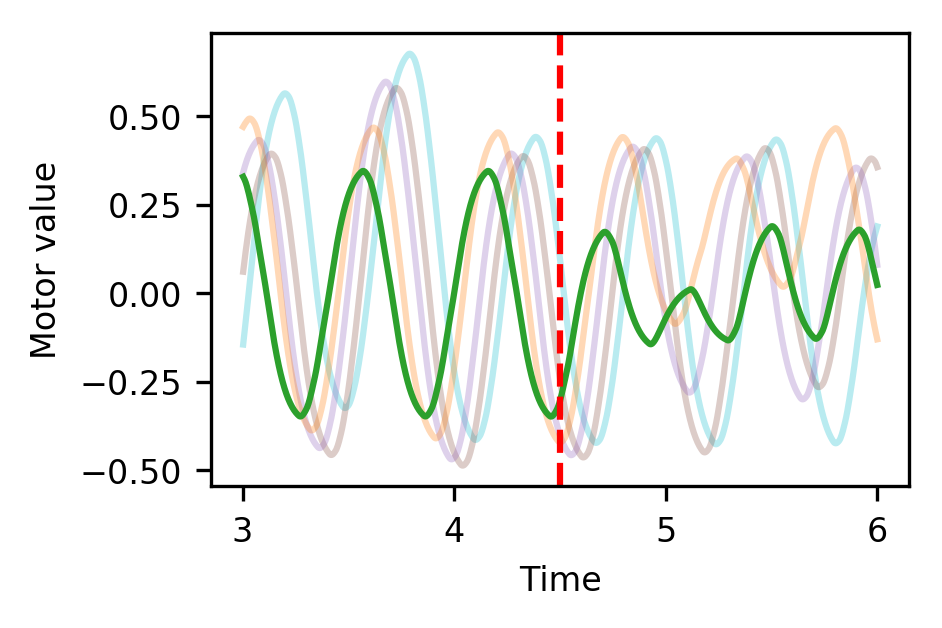

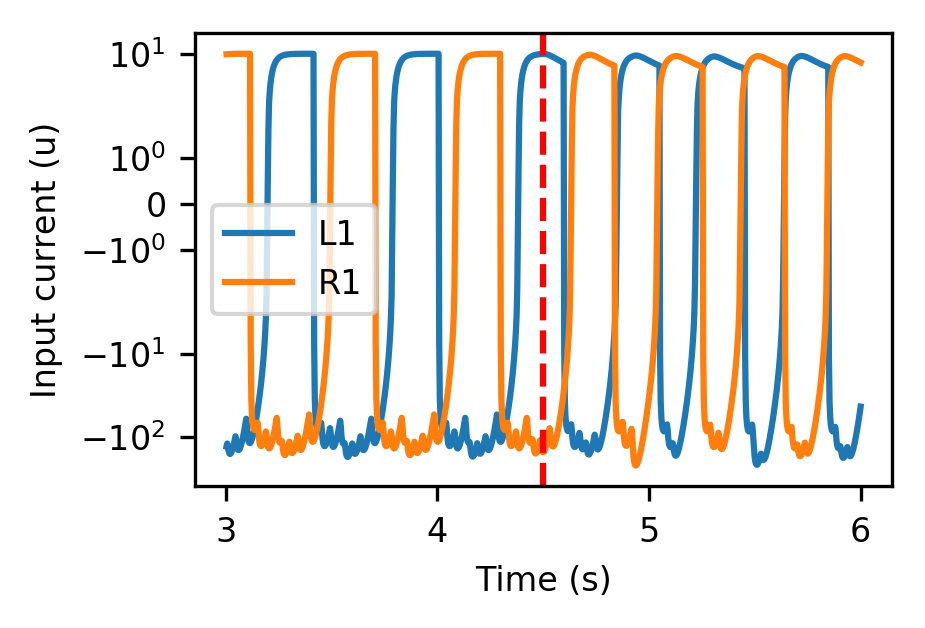

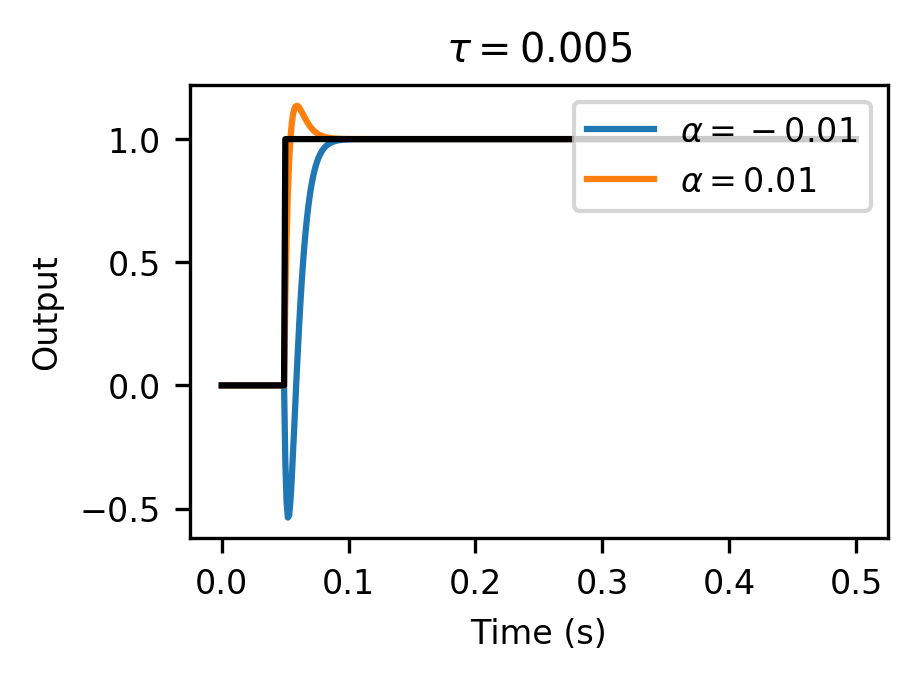

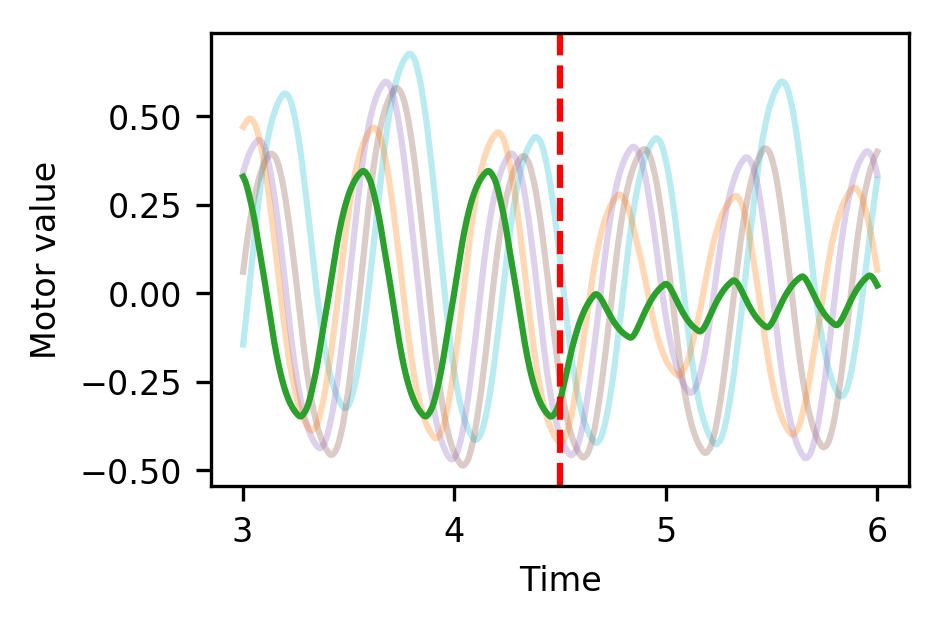

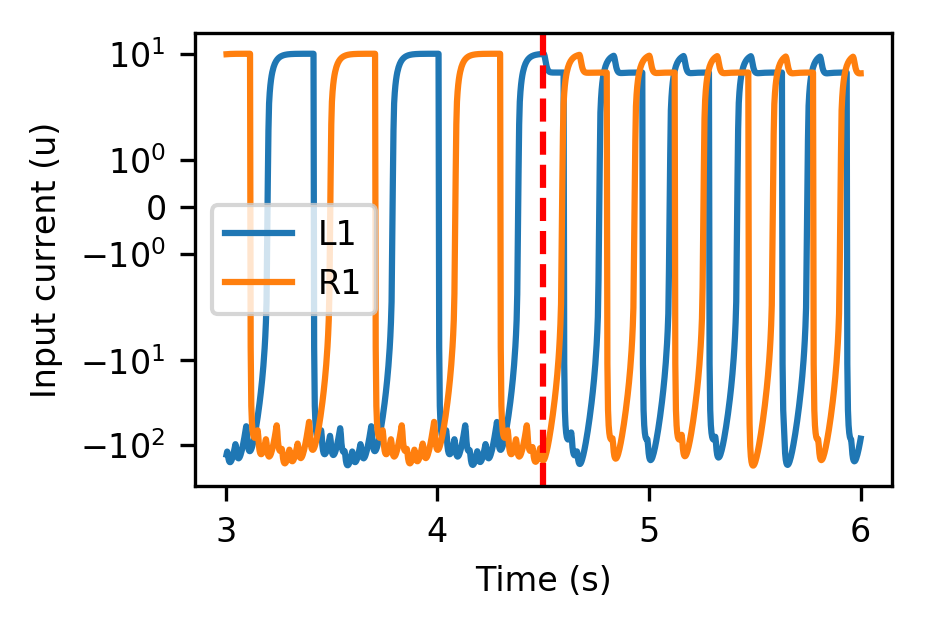

In [288]:
alphas = [1,0.1,0.01]
taus = [0.5,0.05,0.005]
for tau, alpha in zip(taus,alphas):
    run_compliance_exp(tau, alpha)
# for tau, alpha in zip(taus,alphas):
#     run_compliance_exp(tau, alpha,method=([-1,1,-1,1],[1,-1,1,-1]))

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

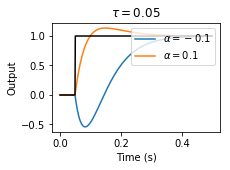

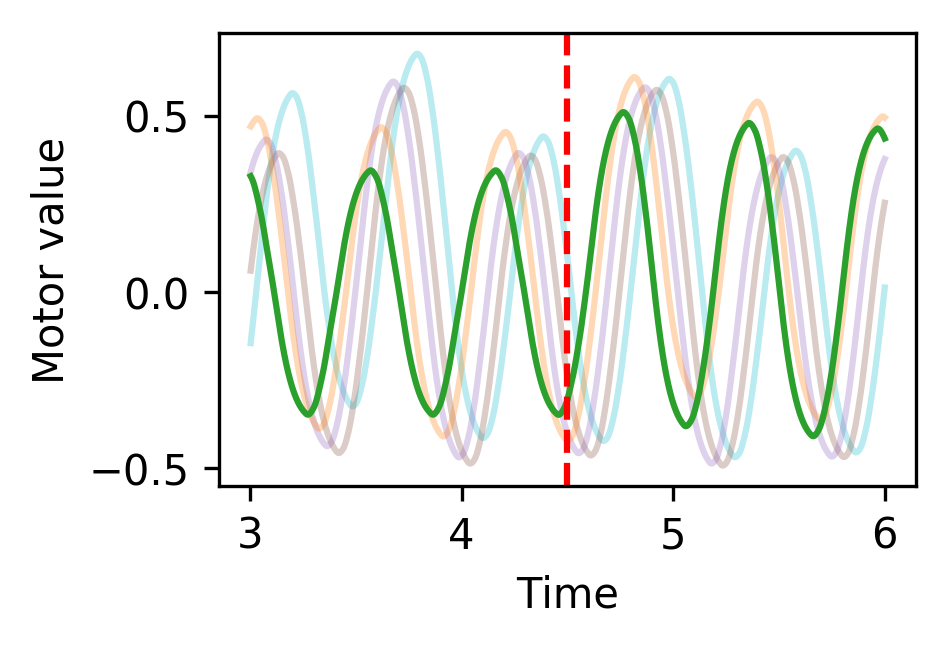

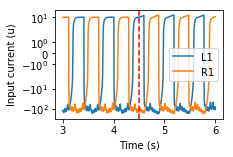

In [15]:
run_compliance_exp(0.05, 0.1,)

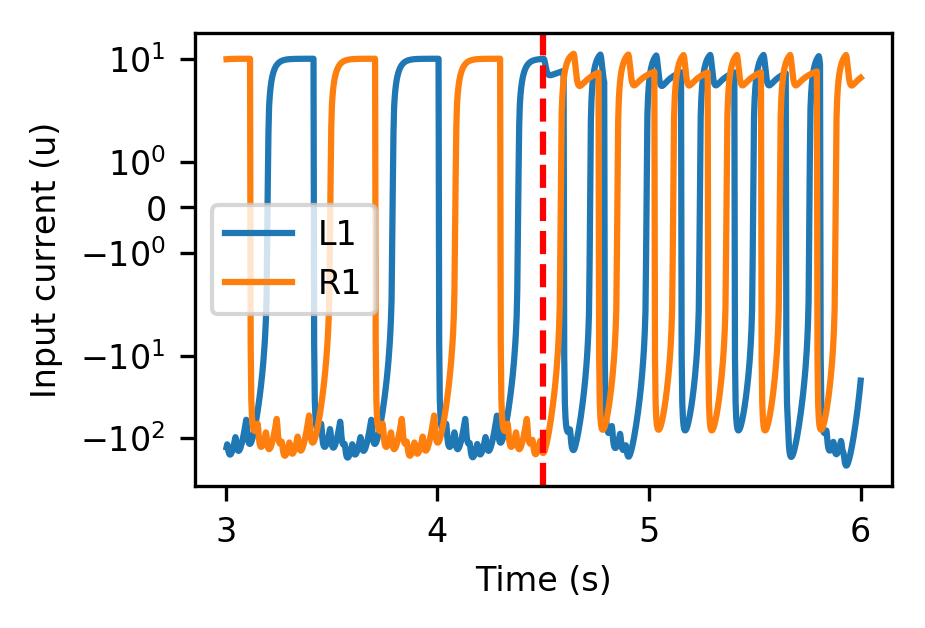

In [225]:
fig, ax = plt.subplots(figsize=(3,2))
plot_input_currents(ax,mn,sim,begin_time,inp_probes,insert_time)
savefig(fig, 'inhib_current_filt_inp')

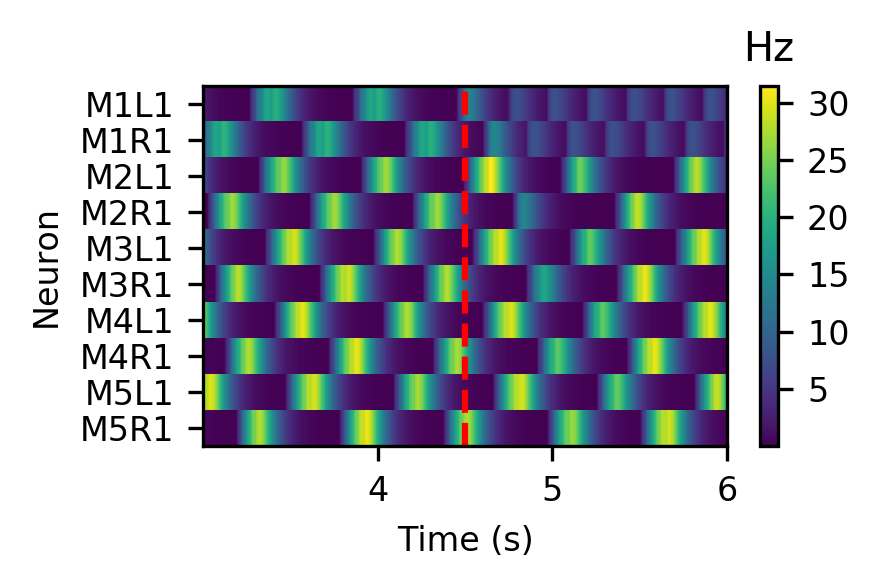

In [220]:
fig, axs = plt.subplots(figsize=(3,2))
plot_spikes(axs,sim,probes,[0,1,2,3,4],begin_time,insert_time)
savefig(fig, 'inhib_current_filt_spikes')

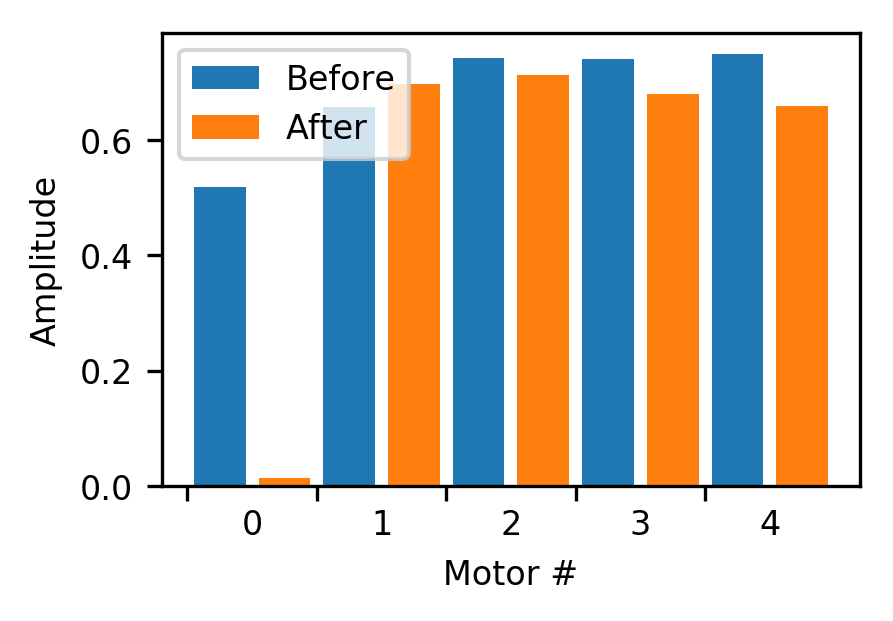

In [221]:
fig,ax = plt.subplots(figsize=(3,2))
plot_before_after_bar(ax,mn,begin_time, sim,insert_time,np.arange(5),baseline_output )
savefig(fig, 'inhib_current_filt_bar')

In [553]:
import cpg_search
import cpg_search.run_motif_search
reload(cpg_search.run_motif_search)
from cpg_search.run_motif_search import *
with open('/home/raph/cpg_search/top_preformer_041221_210202.pkl') as fp:
    metadata = pickle.load(fp)

mm,lr,imm = metadata[0]
imm = imm*0.02
lr = lr
mm = mm


N = 12
defaults = dict(
    neuron_type=nengo.AdaptiveLIF(tau_n=1, inc_n=0.5, tau_rc=0.02, tau_ref=0.02, min_voltage=0, amplitude=1)
)
    

model,mn1, probes1 = generate_nengo_model(
    mm,
    lr,
    imm, 
    modules=N,
    generate_probes=True,
#     generate_probes=False,
    crop=None, 
    defaults=defaults,
    imm_synapse=nengo.Alpha(0.05),
    w_synapse=nengo.Alpha(0.02)
)
insert_time = 6
for ens in model.ens:
    if ens.label == "module_0":
                with model:
                    inp = nengo.Node(output=lambda t: -0.4 if t > insert_time else 0)
                    nengo.Connection(inp, ens.neurons[0], synapse=None)
#                     nengo.Connection(inp, ens.neurons[4],transform=-1, synapse=None)




In [466]:
with nengo.Simulator(model, seed=0,dt=0.003) as sim:
    
    for i,ens in enumerate(model.ens):
        signal = sim.model.sig[ens.neurons]
        sim.signals[signal['voltage']][:4] = np.ones(4)
#         if i == 0:
#             break
        
    sim.run(12)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

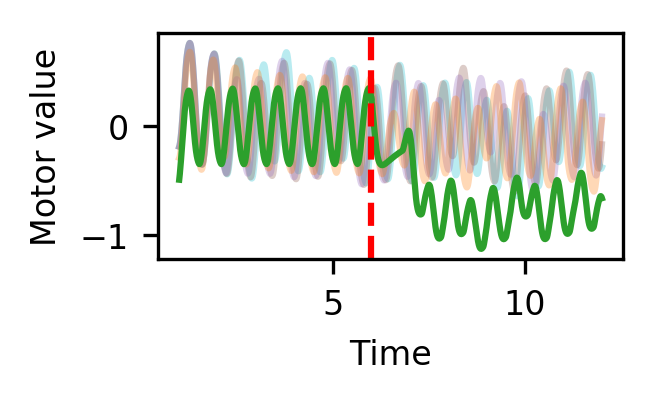

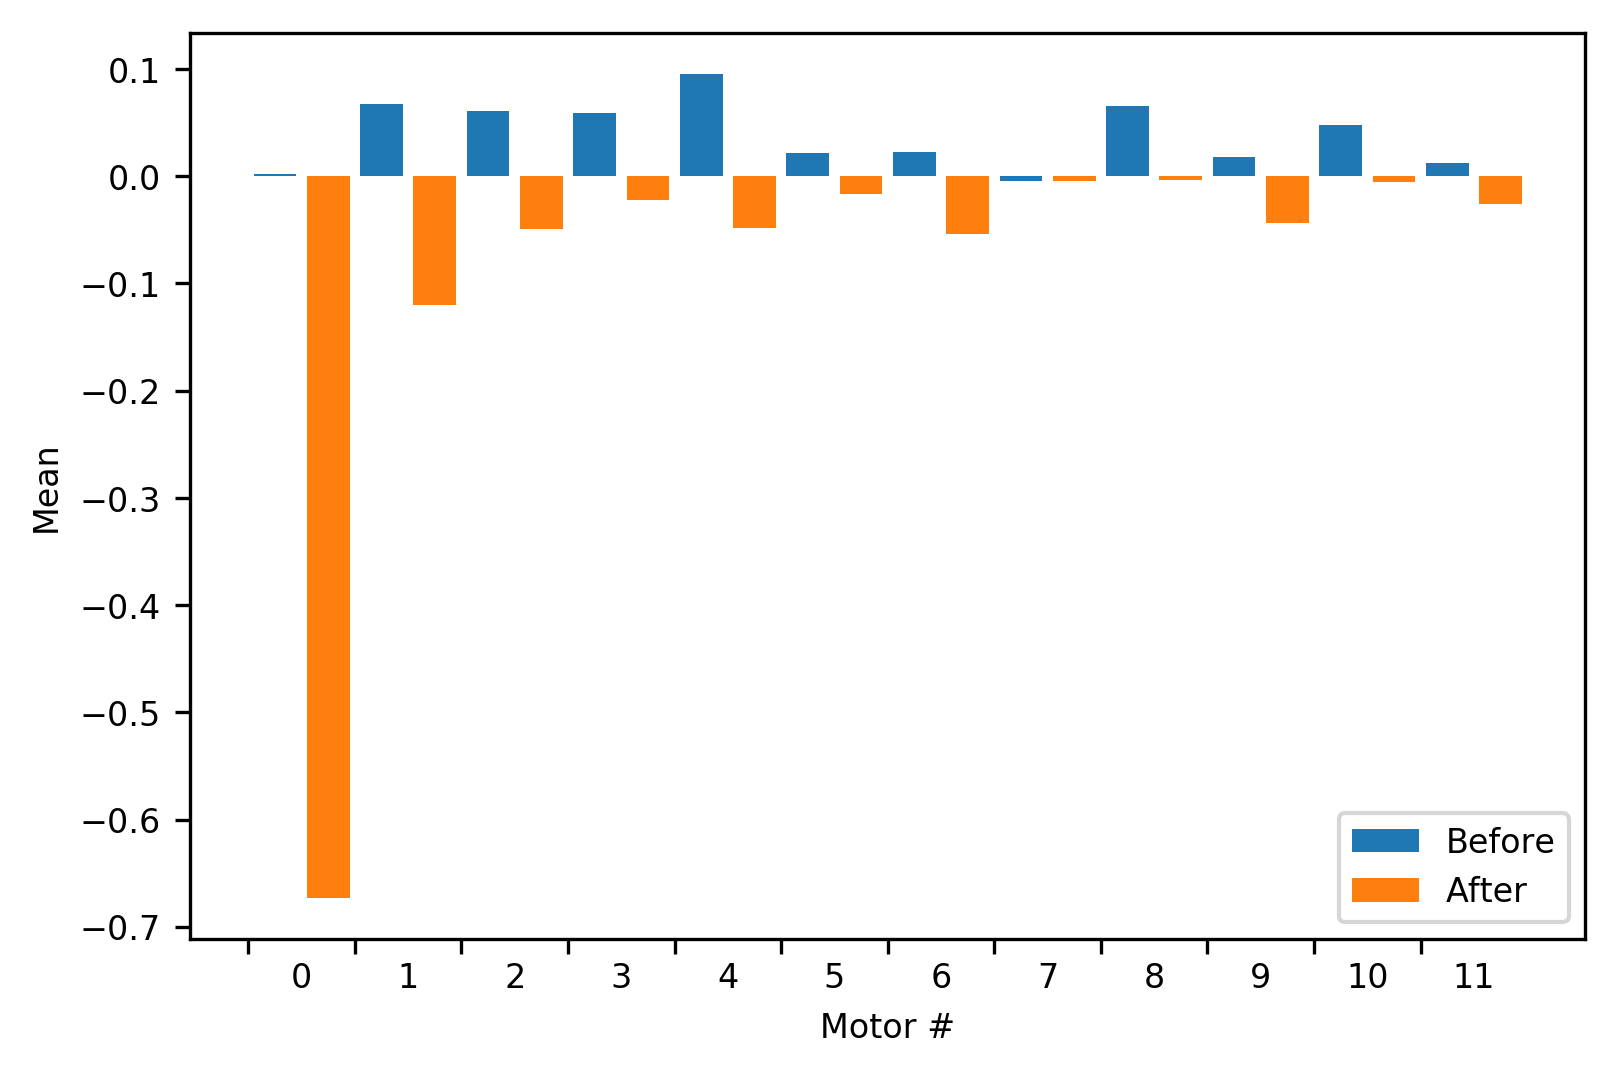

In [472]:
import matplotlib
matplotlib.rcParams["savefig.format"] = "pdf"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["font.size"] = 8
begin_time = 1
tslc = np.where(T>begin_time)

out = np.array(mn1.rets[1:])
T = sim.trange()
in_slc = np.where(T>insert_time)[0]
out_slc = np.where(np.logical_and(begin_time<T,T<insert_time))[0]
tslc = np.where(T>begin_time)[0]
fig,ax = plt.subplots(figsize=(2,1),dpi=300)
lcolors = ['tab:green', 'tab:orange','tab:purple','tab:brown','tab:cyan']
sc = 5
for i in np.arange(4,-1,-1):
    if i == 0:
        ax.plot(T[out_slc], out[out_slc,i]/sc,color=lcolors[i])
        ax.plot(T[in_slc], out[in_slc,i]/sc,color=lcolors[i])
    else:
        ax.plot(T[tslc], out[tslc,i].squeeze()/sc,color=colors[i],alpha=0.3)
ax.axvline(insert_time,color='r', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Motor value')
fig.savefig('./figures/2k_inhib.pdf')


before_mean = []
after_mean = []
for i in range(modules):
    b = out[out_slc,i]/sc
    a = out[in_slc,i]/sc
    before_mean.append(np.mean(b))
    after_mean.append(np.mean(a))
fig,ax = plt.subplots()
M_r = np.arange(modules)
ax.bar(M_r*2, before_mean)
ax.bar(M_r*2+1, after_mean)
ax.set_xticks(M_r*2+0.5,minor=True)
ax.set_xticks(M_r*2-0.5)
ax.tick_params(axis='x',which='minor',bottom=False)
ax.tick_params(axis='x',which='major',labelbottom=False)
ax.set_xticklabels(M_r,minor=True)
ax.legend(['Before','After'])
ax.set_xlabel('Motor #')
ax.set_ylabel('Mean')
savefig(fig,'motor_activation_turning')

In [526]:
spike1 = [sim.data[probes1[i]['spikes']] for i in range(len(probes1))]

labels = ['M{}{}{}']
it = list(range(N))
it = [0,1,2,3,4,5]
labels = []
    
ims = []
for i in it:
    ims.append(spike1[i][np.ix_(tslc,[0,4])])
    labels.extend(['M%iL1'% (i+1),'M%iR1'%(i+1)])
fig,axs = plt.subplots(figsize=(6,2))
ims = np.hstack(ims).T
print(ims.shape)
bt = T[tslc][0]
et = T[tslc][-1]
bi = -0.5
ei = ims.shape[0]-0.5
im = axs.matshow(ims,aspect='auto',extent=[bt,et,ei,bi])
# im = axs[0].matshow(ims,aspect='auto')

axs.set_xlabel('Steps')
axs.set_ylabel('Neuron')
axs.set_yticks(range(len(it)*2))
axs.xaxis.tick_bottom()
axs.set_yticklabels(labels)
axs.title.set_text('Neuron activation')
cbar = plt.colorbar(im,ax=axs)
cbar.ax.title.set_text('Hz')
labels = ['M1L1', 'M1R1','M2L1','M2R1','M3L1','M3R1']
plt.tight_layout()
savefig(fig,'neuron_activation_turning')

KeyError: <Probe at 0x7f116e160290 of 'spikes' of <Neurons of <Ensemble "module_0">>>